## Manejo de Datos Raster

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path
from timeit import timeit
from time import time

def count_elapsed_time(f):
    """
    Decorator.
    Execute the function and calculate the elapsed time.
    Print the result to the standard output.
    """
    def wrapper():
        # Start counting.
        start_time = time()
        # Take the original function's return value.
        ret = f()
        # Calculate the elapsed time.
        elapsed_time = time() - start_time
        print("Elapsed time: %0.10f seconds." % elapsed_time)
        return ret
    
    return wrapper

In [3]:

def load_land_image(path_folder, bands):
    images={}
    path=Path(path_folder)
    for band in bands:
        file= next(path.glob(f'*_T1_{band}.tif'))
        print(f'Opening file {file}')
        ds= rasterio.open(file)        
        images.update({band: ds.read(1)})

    return images



img = load_land_image('E:/Data/Raster/imagenes landsat 9/monteria parte 1', ['B2', 'B3', 'B4'])



Opening file E:\Data\Raster\imagenes landsat 9\monteria parte 1\LC09_L1TP_009054_20220106_20230502_02_T1_B2.TIF
Opening file E:\Data\Raster\imagenes landsat 9\monteria parte 1\LC09_L1TP_009054_20220106_20230502_02_T1_B3.TIF
Opening file E:\Data\Raster\imagenes landsat 9\monteria parte 1\LC09_L1TP_009054_20220106_20230502_02_T1_B4.TIF


In [4]:

rgb = np.stack([img['B4'], img['B3'], img['B2']], axis=-1)
rgb = rgb/rgb.max() * 2



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.21614081014053457..1.7704946266189032].


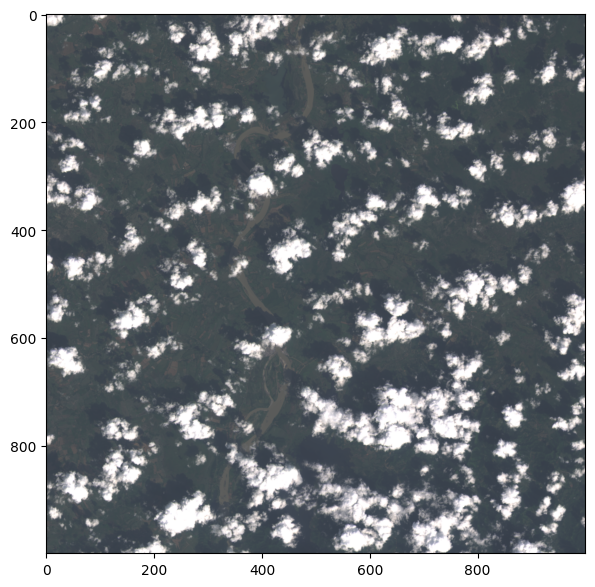

In [5]:
plt.figure(figsize=(7,7))
plt.imshow(rgb[4000:5000, 5400:6400, 0:3])